In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
file_path = "/content/QVI_transaction_data.xlsx"
df =  pd.read_excel(file_path)

In [4]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
df.dtypes

,0
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


## ❗ Pourquoi allons nous convertir la date ?

### Nous avons un fichier Excel et Excel stocke les dates comme des entiers alors on doit les convertir afin que Python puisse les lire comme date.

####Après conversion, les dates seront utilisables pour :

####grouper par mois

####analyser les tendances

####tracer des courbes

In [7]:
# convertissons la colonne DATE en format date
df['DATE']= pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

In [8]:
df.dtypes

,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [9]:
# Vérifions
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [10]:
# Vérifier si y'a cohérence quantité / prix

df['PRICE_PER_UNIT'] = df['TOT_SALES'] / df['PROD_QTY']
df['PRICE_PER_UNIT'].describe()


,PRICE_PER_UNIT
count,264836.000000
mean,3.824624
std,1.109523
min,1.320000
25%,3.000000
50%,3.800000
75%,4.600000
max,6.500000


On constate dans notre description des données numérique que le max pour PROD_QTY est de 200 et pour TOT_SALES 650 ce qui pourrait être possible (si c'est un achat fait en gros ou des erreurs) mais ces valeurs restent au-dessus du reste. Etant donné que on veut des données réprésentatives des consommateurs normaux, nous allons donc decider d'exclure ces valeurs plus loin pour faciliter notre analyse.

In [11]:
df['PROD_NAME'].sample(20)


,PROD_NAME
30955,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
95935,Tyrrells Crisps Lightly Salted 165g
62863,Smiths Crinkle Cut Chips Barbecue 170g
134040,Infuzions BBQ Rib Prawn Crackers 110g
142947,Thins Potato Chips Hot & Spicy 175g
148760,Kettle 135g Swt Pot Sea Salt
219654,Cheetos Puffs 165g
239927,Kettle Sensations Siracha Lime 150g
112826,Doritos Corn Chip Southern Chicken 150g
239067,Tostitos Lightly Salted 175g


In [12]:
# Vérifions qu'on n'a pas de produits hors "Chips"
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [13]:
# Vérifions qu'on n'a pas de valeurs négatives dans certaines colonnes
df[(df['PROD_QTY'] <= 0) | (df['TOT_SALES'] <= 0)]



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE_PER_UNIT


L'absence de lignes de données sous les en-têtes est la preuve qu'il n'y a pas de transactions (enregistrements) dont la quantité de produit ou le total des ventes est négatif ou nul dans les colonnes.

In [14]:
# Filtrer les valeurs qu'on juge aberrantes selon notre cas

df_clean = df[(df['PROD_QTY'] > 0) & (df['PROD_QTY'] < 10)]
df_clean = df_clean[df_clean['TOT_SALES'] < 100]

#len(df)
len(df_clean)


264834

### Vérifier la cohérence quantité / prix
### Un prix unitaire “logique” pour des chips est généralement entre 1 $ et 8 $.
### S’il y a des valeurs très extrêmes (0 ou 100 $), on pourra les filtrer.

In [15]:
df_clean['PRICE_PER_UNIT'] = df_clean['TOT_SALES'] / df_clean['PROD_QTY']
df_clean['PRICE_PER_UNIT'].describe()


,PRICE_PER_UNIT
count,264834.000000
mean,3.824629
std,1.109526
min,1.320000
25%,3.000000
50%,3.800000
75%,4.600000
max,6.500000


In [16]:
df_clean['DATE'].min(), df_clean['DATE'].max()


(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [17]:
df_clean.to_csv("/content/transactions_data_clean.csv", index=False)
print("✅ Fichier nettoyé sauvegardé avec succès.")


✅ Fichier nettoyé sauvegardé avec succès.


# Traitons maintenant le fichier purchase behaviour

In [18]:
# lisons le csv/ read csv
file = "/content/QVI_purchase_behaviour.csv"
df1 =  pd.read_csv(file)

In [19]:
df1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [20]:
# vérifions les valeurs manquantes
df1.isna().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [21]:
# vérifions les valeurs nulles
df1.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [22]:
# vérifions les doublons
doublon = df1.duplicated()
doublon.sum()

np.int64(0)

In [23]:
# Normaliser les textes
df1['LIFESTAGE'] = df1['LIFESTAGE'].str.strip().str.title()
df1['PREMIUM_CUSTOMER'] = df1['PREMIUM_CUSTOMER'].str.strip().str.title()

In [24]:
df1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,Young Singles/Couples,Premium
1,1002,Young Singles/Couples,Mainstream
2,1003,Young Families,Budget
3,1004,Older Singles/Couples,Mainstream
4,1005,Midage Singles/Couples,Mainstream
...,...,...,...
72632,2370651,Midage Singles/Couples,Mainstream
72633,2370701,Young Families,Mainstream
72634,2370751,Young Families,Premium
72635,2370961,Older Families,Budget


# Fusionnons les deux datasets

In [25]:
merged = pd.merge(
    df_clean,
    df1,
    how='inner',
    on='LYLTY_CARD_NBR'
)

print(merged.shape)
merged


(264834, 11)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,Young Singles/Couples,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10,Midage Singles/Couples,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,Midage Singles/Couples,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00,Midage Singles/Couples,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60,Midage Singles/Couples,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.40,Young Singles/Couples,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,4.40,Young Singles/Couples,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,4.40,Young Singles/Couples,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,3.90,Young Singles/Couples,Premium


# Sauvegardons le fichier combiné

In [26]:
merged.to_csv("/content/merged_data.csv", index=False)


# vérifions que notre fichier merged est clean comme on le souhaite

In [27]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PRICE_PER_UNIT    264834 non-null  float64       
 9   LIFESTAGE         264834 non-null  object        
 10  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 22.2+ MB


In [28]:
merged.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PRICE_PER_UNIT,0
LIFESTAGE,0


In [29]:
merged.duplicated().sum()

np.int64(1)

# On observe un doublon donc nous allons l'identifier et le supprimer

In [30]:
# Affiche la ligne qui est la deuxième (ou énième) occurrence de ce doublon
merged[merged.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
124841,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,3.0,Older Singles/Couples,Premium
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,3.0,Older Singles/Couples,Premium


In [31]:
# Supprimons le doublon (conserve la première occurrence) et mettons à jour le DataFrame
merge = merged.drop_duplicates(keep='first')

# Vérification : doit maintenant retourner 0
merge.duplicated().sum()

np.int64(0)

# Passons à l'analyse descriptive

## Totam des ventes globales

In [32]:
total_sales = merge['TOT_SALES'].sum()
total_sales

np.float64(1933108.9999999998)

## Moyenne des ventes par client

In [33]:
avg_sales_per_client = merge.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean()
avg_sales_per_client.sum()

np.float64(515636.342793783)

## Ventes par marque

In [34]:
sales_per_brand = merge.groupby('PROD_NAME')['TOT_SALES'].sum()
sales_per_brand

,TOT_SALES
PROD_NAME,
Burger Rings 220g,6831.0
CCs Nacho Cheese 175g,5961.9
CCs Original 175g,6048.0
CCs Tasty Cheese 175g,6069.0
Cheetos Chs & Bacon Balls 190g,9243.3
...,...
WW Sour Cream &OnionStacked Chips 160g,5323.8
WW Supreme Cheese Corn Chips 200g,5390.3
Woolworths Cheese Rings 190g,5169.6


## Ventes par taille de paquet (on profite pour créer une nouvelle colonne)

Souvent, la taille est contenue dans le nom du produit (on pu le voir dans les nom des produits plus haut).

In [35]:
#merge['PACK_SIZE'] = merge['PROD_NAME'].str.extract(r'(\d+)g').astype(float)
#sales_by_pack_size = merge.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False)
#sales_by_pack_size

In [36]:
# Correction 1 : Utilisation de .loc pour éviter le SettingWithCopyWarning (meilleure pratique)
# Correction 2 : Utilisation d'une Regex plus souple (ignorer la casse et les espaces) je rappelle ici que c'est grâce à l'utilisation de l'IA que j'ai eu ce code
# donc j'ai opté pour lui par rapport au précedent

merge.loc[:, 'PACK_SIZE'] = merge['PROD_NAME'].str.extract(r'(\d+)\s*[gGmM]')[0].astype(float)
sales_by_pack_size = merge.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False)
sales_by_pack_size

/tmp/ipython-input-4164318362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge.loc[:, 'PACK_SIZE'] = merge['PROD_NAME'].str.extract(r'(\d+)\s*[gGmM]')[0].astype(float)


,TOT_SALES
PACK_SIZE,
175.0,485431.4
150.0,304288.5
134.0,177655.5
110.0,162765.4
170.0,146673.0
330.0,136794.3
300.0,113330.6
165.0,101360.6
380.0,75419.6


# on crée aussi une nouvelle colonne pour la marque et on observe les ventes par marques

In [37]:
# Extraire la marque (premier mot)
merge.loc[:, 'BRAND'] = merge['PROD_NAME'].str.split().str[0]

# Corriger quelques anomalies (facultatif)
# Ensure we are operating on 'merge' and use .loc for safe assignment
merge.loc[:, 'BRAND'] = merge['BRAND'].replace({
    'RRD': 'Red Rock Deli',
    'SMITHS': 'Smiths',
    'KETTLE': 'Kettle',
    'DORITOS': 'Doritos'
})

/tmp/ipython-input-2758827604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge.loc[:, 'BRAND'] = merge['PROD_NAME'].str.split().str[0]


In [38]:
# Display top 20 sales by brand
sales_per_brand.sort_values(ascending=False).head(20)

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,39052.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
Kettle Mozzarella Basil & Pesto 175g,34457.4
Smiths Crinkle Original 330g,34302.6
Cheezels Cheese 330g,34296.9
Doritos Cheese Supreme 330g,33390.6
Kettle Sweet Chilli And Sour Cream 175g,33031.8
Kettle Original 175g,32740.2


In [39]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264833 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   PRICE_PER_UNIT    264833 non-null  float64       
 9   LIFESTAGE         264833 non-null  object        
 10  PREMIUM_CUSTOMER  264833 non-null  object        
 11  PACK_SIZE         264833 non-null  float64       
 12  BRAND             264833 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usa

## Ventes par segment client

In [40]:
sales_by_segment = merge.groupby('LIFESTAGE')['TOT_SALES'].sum()
sales_by_segment.sort_values(ascending=False)

,TOT_SALES
LIFESTAGE,
Older Singles/Couples,402420.75
Retirees,366470.90
Older Families,352467.20
Young Families,316160.10
Young Singles/Couples,260405.30
Midage Singles/Couples,184751.30
New Families,50433.45


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/sales_by_segment_plot.png'

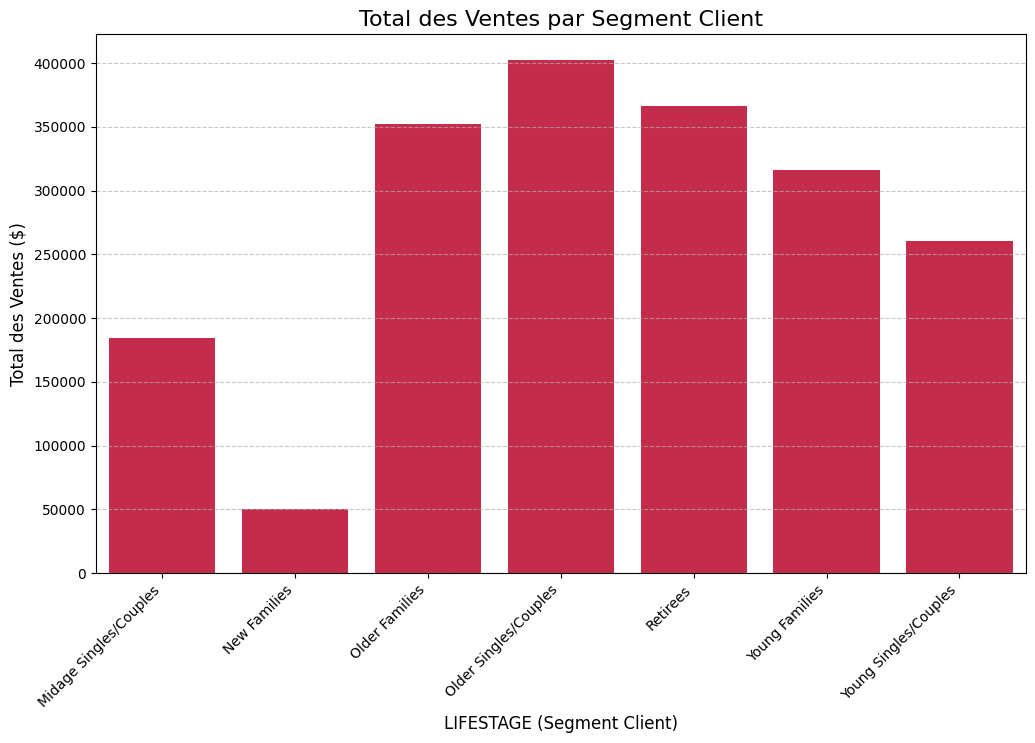

In [41]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values, color='crimson')
plt.title('Total des Ventes par Segment Client', fontsize=16)
plt.xlabel('LIFESTAGE (Segment Client)', fontsize=12)
plt.ylabel('Total des Ventes ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("outputs/sales_by_segment_plot.png")
plt.show()

# ÉTAPE De Visualisations

In [ ]:
# Ventes par taille
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_pack_size.index, y=sales_by_pack_size.values, color='skyblue')
plt.title("Total des ventes par taille de paquet (g)")
plt.xlabel("Taille (g)")
plt.ylabel("Ventes ($)")
#plt.tight_layout()
plt.savefig("/content/sales_by_pack.png")
plt.show()


In [ ]:
# Total des ventes par marque

plt.figure(figsize=(12,6))
sns.barplot(x=sales_per_brand.index, y=sales_per_brand.values, color='skyblue')
plt.title("Total des ventes par marque")
plt.xlabel("marque")
plt.ylabel("Ventes ($)")
#plt.tight_layout()
plt.savefig("/content/sales_by_pack.png")
plt.show()


# ÉTAPE De Sauvegarder des résultats

In [ ]:
import os

# Create the directories if they don't exist
os.makedirs('data/cleaned', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

merged.to_csv("data/cleaned/merged_data.csv", index=False)
sales_by_pack_size.to_csv("outputs/sales_by_pack.csv")
sales_per_brand.to_csv("outputs/sales_by_brand.csv")
sales_by_segment.to_csv("outputs/sales_by_segment.csv")

#Test statistique : différence Premium vs Mainstream

L’objectif est de tester si les clients Premium dépensent significativement plus que les Mainstream.

Ce qu'on doit savoir

### 1. Le Test t (t-test) Le Test t est une méthode statistique utilisée pour comparer les moyennes de deux groupes différents.Hypothèse Nulle ($H_0$) : Il n'y a aucune différence significative entre les moyennes des deux groupes (par exemple, $\text{Moyenne}_{\text{Premium}} = \text{Moyenne}_{\text{Mainstream}}$).

### Hypothèse Alternative ($H_1$) : Il existe une différence significative entre les moyennes des deux groupes.Utilité : Dans notre cas, il sert à répondre à la question : "Les clients Premium dépensent-ils vraiment plus (ou moins) en moyenne que les clients Mainstream, ou la différence que nous observons dans nos données n'est-elle que le fruit du hasard ?"

### 2. La Valeur p (p-value)La valeur p est la probabilité d'observer les données que nous avons (ou des données encore plus extrêmes) SI l'hypothèse nulle ($H_0$) était vraie.

### Utilité : Elle est utilisée pour prendre la décision finale : Si p-value $\le \alpha$ (seuil de signification, généralement 0.05) : on rejete $H_0$. La différence observée est statistiquement significative.
### Si p-value $> \alpha$ : on ne rejete pas $H_0$. La différence observée pourrait être due au hasard.

In [46]:
from scipy import stats

premium_sales = merge[merge['PREMIUM_CUSTOMER'] == 'Premium']['TOT_SALES']
mainstream_sales = merge[merge['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES']

t_stat, p_value = stats.ttest_ind(premium_sales, mainstream_sales)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -7.912461410084792
p-value: 2.538392195853852e-15


# interprètation des résultats ci-dessus
### La valeur de $-7.91$ est grande en magnitude (loin de $0$). Elle indique que l'écart entre la moyenne des ventes Premium et la moyenne des ventes Mainstream est très important par rapport à la variabilité interne des données. Le signe négatif suggère que les ventes des clients Mainstream sont, en moyenne, supérieures à celles des clients Premium.

p-value $2.54 \times 10^{-15}$ Cette valeur est extrêmement proche de zéro ($0.000...00254$).

### Conclusion statistique

### Puisque la p-value ($2.54 \times 10^{-15}$) est nettement inférieure au seuil de signification commun ($\alpha = 0.05$ ou même $\alpha = 0.01$), on rejete l'hypothèse nulle ($H_0$).

### Interprétation finale : Il existe une différence statistiquement significative entre les ventes moyennes des clients Premium et celles des clients Mainstream. Cette différence est très probablement réelle et n'est pas due au hasard. ###

##Segmentation client : identifier les segments les plus rentables

Analysons les ventes totales par combinaison de Lifestage et Premium Status :

### Cette analyse vise à comprendre quels segments de clients sont les plus rentables en termes de ventes totales, en combinant les critères de cycle de vie (LIFESTAGE) et de statut client (PREMIUM_CUSTOMER).

### Interprétation de l'Analyse des Ventes par Segment
### L'analyse a regroupé (groupby) les données par la combinaison unique de LIFESTAGE et PREMIUM_CUSTOMER, puis a calculé la somme des ventes totales (TOT_SALES.sum()) pour chaque segment, triant les résultats par ordre décroissant (ascending=False).

In [44]:
segment_sales =  merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
segment_sales.sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
Older Families          Budget              168363.25
Young Singles/Couples   Mainstream          157621.60
Retirees                Mainstream          155677.05
Young Families          Budget              139345.85
Older Singles/Couples   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132257.15
Retirees                Budget              113147.80
Older Families          Mainstream          103445.55
Retirees                Premium              97646.05
Young Families          Mainstream           92788.75
Midage Singles/Couples  Mainstream           90803.85
Young Families          Premium              84025.50
Older Families          Premium              80658.40
Young Singles/Couples   Budget               61141.60
Midage Singles/Couples  Premium              58432.65
Young Singles/Couples   Premium              41642.10
Midage Singles/Couples  Budget               35514.80
New Families            Budget               21928.45
                        Mainstream           17013.90
                        Premium              11491.10
Name: TOT_SALES, dtype: float64

## Analysons de plus près les resultats ci-dessus

### 1. Les Segments les Plus Rentables (Top 3)

### Le tableau montre que les ventes sont dominées par les clients qui sont plus établis ou qui ont des besoins familiaux importants.

## 1er : Older Families - Budget (168 363.25)

### Les Familles Plus Âgées qui achètent des produits orientés Budget génèrent le revenu total le plus élevé. Cela suggère qu'elles achètent de très grandes quantités de produits peu chers.

## 2e : Young Singles/Couples - Mainstream (157 621.60)

### Les Jeunes Célibataires/Couples qui ne sont pas dans les catégories Budget ou Premium sont également un segment extrêmement important. Ils ont peut-être des revenus disponibles pour des produits courants sans être sensibles aux prix ni chercher le haut de gamme.

## 3e : Retirees - Mainstream (155 677.05)

### Les Retraités non Premium/Budget représentent un flux de ventes très fiable et régulier.

## 2. Le Rôle du Statut Premium

### Le statut Premium est systématiquement classé en dessous des statuts Budget et Mainstream pour les mêmes phases de vie (LIFESTAGE) dans le haut du classement.

#### Par exemple, pour les Older Families, le segment Budget est n°1, tandis que le segment Premium est beaucoup plus bas (80 658.40).

### Cela indique que, même si les clients Premium peuvent avoir un panier moyen plus élevé (plus de produits chers par visite), ils sont moins nombreux ou achètent moins souvent que les clients Budget ou Mainstream, ce qui fait que leur contribution aux ventes totales est plus faible.

## 3. Les Segments à Faible Contribution (Bottom)
### Les segments New Families (Nouvelles Familles) sont les moins rentables, quel que soit leur statut (Budget, Mainstream ou Premium).

### Ceci est logique car les Nouvelles Familles peuvent avoir moins de revenus disponibles ou moins de membres à la maison par rapport aux Older Families ou Young Families.

## regardons ce que ça nous donne en image

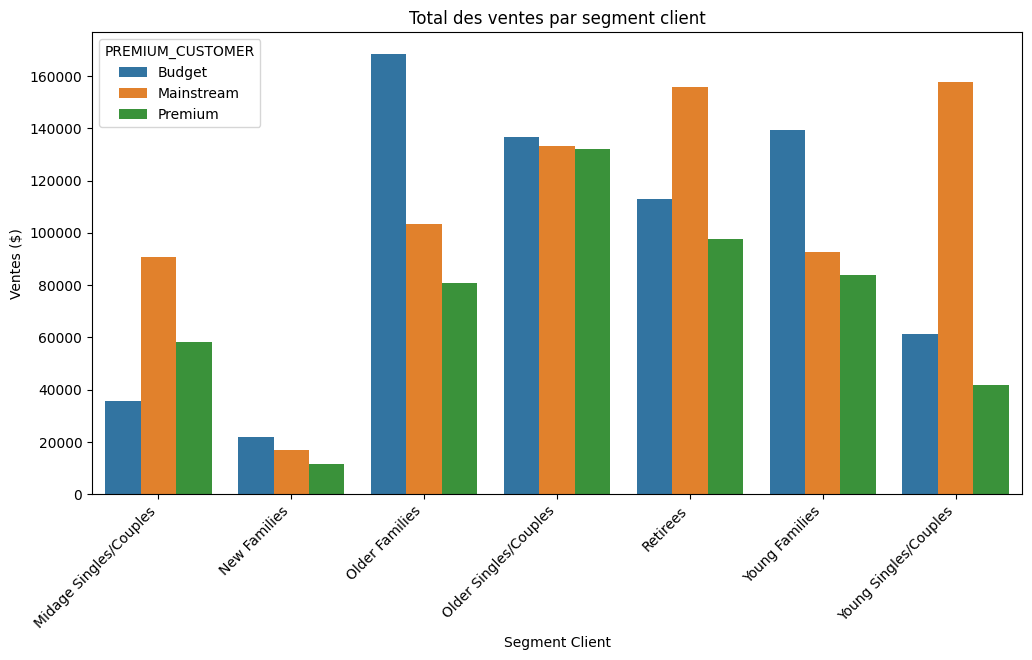

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=segment_sales.reset_index())
plt.title("Total des ventes par segment client")
plt.xlabel("Segment Client")
plt.ylabel("Ventes ($)")
plt.xticks(rotation=45, ha='right')
plt.savefig("/content/sales_by_segment.png")
plt.show()

## Effet de la taille du paquet (PACK_SIZE) et de la marque (BRAND)
A. Taille du paquet

In [49]:
pack_effect = merge.groupby('PACK_SIZE')['TOT_SALES'].mean().sort_values(ascending=False)
pack_effect

,TOT_SALES
PACK_SIZE,
175.0,485431.4
150.0,304288.5
134.0,177655.5
110.0,162765.4
170.0,146673.0
330.0,136794.3
300.0,113330.6
165.0,101360.6
380.0,75419.6


Le volume n'est pas tout (Analyse en Moyenne) : Contrairement à l'analyse en somme des ventes (qui favorise les produits les plus vendus en volume), cette analyse en moyenne révèle que, lorsqu'un client achète un paquet de 175g, cela résulte, en moyenne, en un panier beaucoup plus cher (485 431.4 unités monétaires) que l'achat de n'importe quelle autre taille de paquet.

Panier Moyen Élevé pour 175g : La différence entre la première et la deuxième position est énorme. Il y a probablement un type de produit spécifique ou un scénario de vente unique associé à la taille de paquet de 175g qui pousse les clients à dépenser beaucoup plus dans cette même transaction. Cela pourrait indiquer que ce paquet est souvent acheté en combinaison avec d'autres articles très chers.

Les petites tailles sont en bas : Les tailles de paquet plus petites (comme 125g, 70g, 90g) se trouvent généralement en bas du classement, ce qui est attendu. Lorsque les clients achètent de petites quantités, le montant total de leur panier (en moyenne) est plus faible.

Pistes d'actions
Analyser le 175g : L'entreprise devrait examiner le produit ou la catégorie de produits vendus en 175g pour comprendre pourquoi il est associé à des transactions si coûteuses et essayer de reproduire ce comportement d'achat sur d'autres tailles.

Corrélation : Pour une analyse plus poussée, il serait intéressant de calculer la corrélation entre PACK_SIZE et TOT_SALES pour voir si, de manière générale, la taille du paquet influence directement le total des ventes, ou si seulement quelques tailles spécifiques sont des outliers (comme le 175g).

## Marque

In [51]:
brand_effect = merge.groupby('BRAND')['TOT_SALES'].mean().sort_values(ascending=False)
brand_effect

,TOT_SALES
BRAND,
Dorito,12.268929
Old,9.736712
Kettle,9.451652
Cheezels,8.696481
Twisties,8.623027
Tostitos,8.424623
Doritos,8.073828
Tyrrells,8.017293
Cobs,7.280491
